## Atherosclerotic Heart Disease 

In [1]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
heart = pd.read_csv('../../data/Heart.csv')
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
def yes_no(s):
    if s == "Yes":
        return 1
    elif s == "No":
        return 0

heart.AHD.apply(yes_no).head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [4]:
heart['ahd_num'] = heart.AHD.apply(yes_no)

In [5]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0


In [6]:
def plot_svm(i, clf, title, x1, x2, y):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(grid_stack).reshape(xx.shape)
    # Put the result into a color plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)

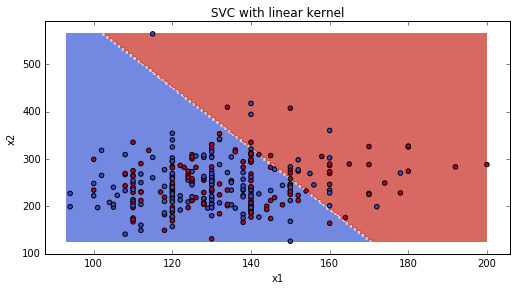

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

col1, col2 = 'RestBP', 'Chol'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors

svc = svm.SVC(kernel='linear', C=1.0).fit(X, y)

h = 1  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
y_min, y_max = X[col2].min() - 1, X[col2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid_stack = np.stack([xx.flatten(), yy.flatten()]).T


plot_svm(0, svc,'SVC with linear kernel' , X[col1], X[col2], y)


plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Data has already been done in previous cell!

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)




In [ ]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plot_svm(i, clf, titles[i], X[col1], X[col2], y)

plt.show()